In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


class neuralnetwork(nn.Module):
    def __init__(self):
        super().__init__()  

        self.w00 = nn.Parameter(torch.tensor(0.0))
        self.w01 = nn.Parameter(torch.tensor(0.0))
        self.w02 = nn.Parameter(torch.tensor(0.0))

        self.b00 = nn.Parameter(torch.tensor(0.0))
        self.b01 = nn.Parameter(torch.tensor(0.0))
        self.b02 = nn.Parameter(torch.tensor(0.0))

      
        self.w10 = nn.Parameter(torch.tensor(0.0))
        self.w11 = nn.Parameter(torch.tensor(0.0))

        self.b10 = nn.Parameter(torch.tensor(0.0))
        self.b11 = nn.Parameter(torch.tensor(0.0))

        
        self.w20 = nn.Parameter(torch.tensor(0.0))
        self.b20 = nn.Parameter(torch.tensor(0.0))

    def forward(self, input):
       
        input_to_layer1_neuron1 = input * self.w00 + self.b00
        output_to_layer1_neuron1 = F.relu(input_to_layer1_neuron1)

        input_to_layer1_neuron2 = input * self.w01 + self.b01
        output_to_layer1_neuron2 = F.relu(input_to_layer1_neuron2)

        input_to_layer1_neuron3 = input * self.w02 + self.b02
        output_to_layer1_neuron3 = F.relu(input_to_layer1_neuron3)

       
        layer1_sum = output_to_layer1_neuron1 + output_to_layer1_neuron2 + output_to_layer1_neuron3
        input_to_layer2_neuron1 = layer1_sum * self.w10 + self.b10
        output_to_layer2_neuron1 = torch.sigmoid(input_to_layer2_neuron1)

        input_to_layer2_neuron2 = layer1_sum * self.w11 + self.b11
        output_to_layer2_neuron2 = torch.sigmoid(input_to_layer2_neuron2)

       
        combined = output_to_layer2_neuron1 + output_to_layer2_neuron2
        combined_tanh = torch.tanh(combined)

       
        final_output = combined_tanh * self.w20 + self.b20



        return final_output


In [36]:
inputs = torch.linspace(1, 1.5, 40).unsqueeze(1)
true_outputs = 2 * inputs + 1  # example target
print(true_outputs)

tensor([[3.0000],
        [3.0256],
        [3.0513],
        [3.0769],
        [3.1026],
        [3.1282],
        [3.1538],
        [3.1795],
        [3.2051],
        [3.2308],
        [3.2564],
        [3.2821],
        [3.3077],
        [3.3333],
        [3.3590],
        [3.3846],
        [3.4103],
        [3.4359],
        [3.4615],
        [3.4872],
        [3.5128],
        [3.5385],
        [3.5641],
        [3.5897],
        [3.6154],
        [3.6410],
        [3.6667],
        [3.6923],
        [3.7179],
        [3.7436],
        [3.7692],
        [3.7949],
        [3.8205],
        [3.8462],
        [3.8718],
        [3.8974],
        [3.9231],
        [3.9487],
        [3.9744],
        [4.0000]])


Epoch 0, Loss: 12.337606430053711
Epoch 1, Loss: 11.5756254196167
Epoch 2, Loss: 10.86098861694336
Epoch 3, Loss: 10.190658569335938
Epoch 4, Loss: 9.56181526184082
Epoch 5, Loss: 8.971835136413574
Epoch 6, Loss: 8.4182767868042
Epoch 7, Loss: 7.898863792419434
Epoch 8, Loss: 7.411470890045166
Epoch 9, Loss: 6.954115390777588
Epoch 10, Loss: 6.524941444396973
Epoch 11, Loss: 6.122215747833252
Epoch 12, Loss: 5.744315147399902
Epoch 13, Loss: 5.3897199630737305
Epoch 14, Loss: 5.057004451751709
Epoch 15, Loss: 4.744832515716553
Epoch 16, Loss: 4.451951503753662
Epoch 17, Loss: 4.177186012268066
Epoch 18, Loss: 3.919431686401367
Epoch 19, Loss: 3.6776530742645264
Epoch 20, Loss: 3.450875759124756
Epoch 21, Loss: 3.2381863594055176
Epoch 22, Loss: 3.038724899291992
Epoch 23, Loss: 2.851685047149658
Epoch 24, Loss: 2.676306962966919
Epoch 25, Loss: 2.511878252029419
Epoch 26, Loss: 2.357728958129883
Epoch 27, Loss: 2.213228702545166
Epoch 28, Loss: 2.0777859687805176
Epoch 29, Loss: 1.9508

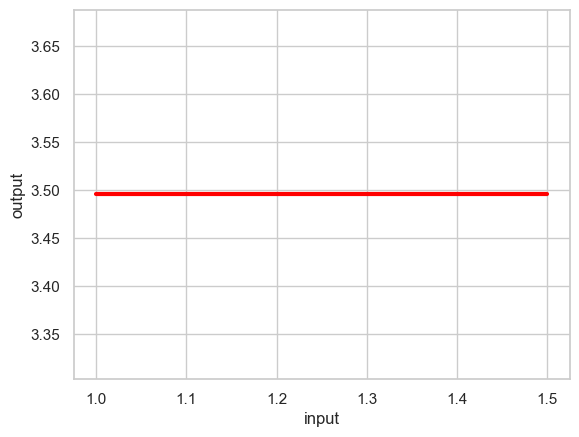

In [ ]:

model = neuralnetwork()
optimizer = SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

final_outputs = []
for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(inputs)
    final_outputs.append(outputs.detach().clone())
    loss = loss_fn(outputs, true_outputs)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")


sns.lineplot(
    x=inputs.squeeze().numpy(),
    y=final_outputs[-1].squeeze().numpy(),
    color='red',
    linewidth=3
)
plt.ylabel('output')
plt.xlabel('input')
plt.show()
